In [7]:
import pandas as pd
import matplotlib
import mysql.connector as mysql
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import numpy as np
import googlemaps
import folium
import tqdm

# import koreanize_matplotlib


In [8]:
remote = mysql.connect (
    host = "database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "roschool",
    password = "1234",
    database = "roschool"
)

In [18]:
cursor = remote.cursor(buffered=True)
cursor.execute("""
                SELECT ct.type, co.income FROM company_info co, comp_type ct
                WHERE (ct.comp_type_id = co.type_id) AND co.income > 1000 
                AND type != "정보없음" 
                AND type != "기타"
""")

result = cursor.fetchall()

df = pd.DataFrame(result)

df

,0,1
0,중견기업,850000
1,중소기업,2035000
2,중소기업,3411000
3,중소기업,1328000
4,중소기업,703000
...,...,...
103,스타트업,494000
104,스타트업,169000
105,스타트업,301000
106,스타트업,66000


In [20]:
df.columns = ["기업분류", "매출"]

df

,기업분류,매출
0,중견기업,850000
1,중소기업,2035000
2,중소기업,3411000
3,중소기업,1328000
4,중소기업,703000
...,...,...
103,스타트업,494000
104,스타트업,169000
105,스타트업,301000
106,스타트업,66000


In [10]:
avg_cursor = remote.cursor(buffered=True)
avg_cursor.execute("""
                SELECT ct.type, ROUND(AVG(co.income)) FROM company_info co, comp_type ct
                WHERE (ct.comp_type_id = co.type_id) AND co.income > 1000 AND type != "정보없음" AND type != "기타"
                GROUP BY ct.type




""")

avg_result = avg_cursor.fetchall()

avg_df = pd.DataFrame(avg_result)

avg_df.head()

,0,1
0,스타트업,679417
1,중소기업,526310
2,중견기업,850000


In [12]:
avg_df.columns = ["기업분류", "평균매출"]

C:\Users\NDY\AppData\Local\Temp\ipykernel_23044\3679592605.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="기업분류", y="매출", data=df, palette="Set2")
c:\Users\NDY\venv\eda_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


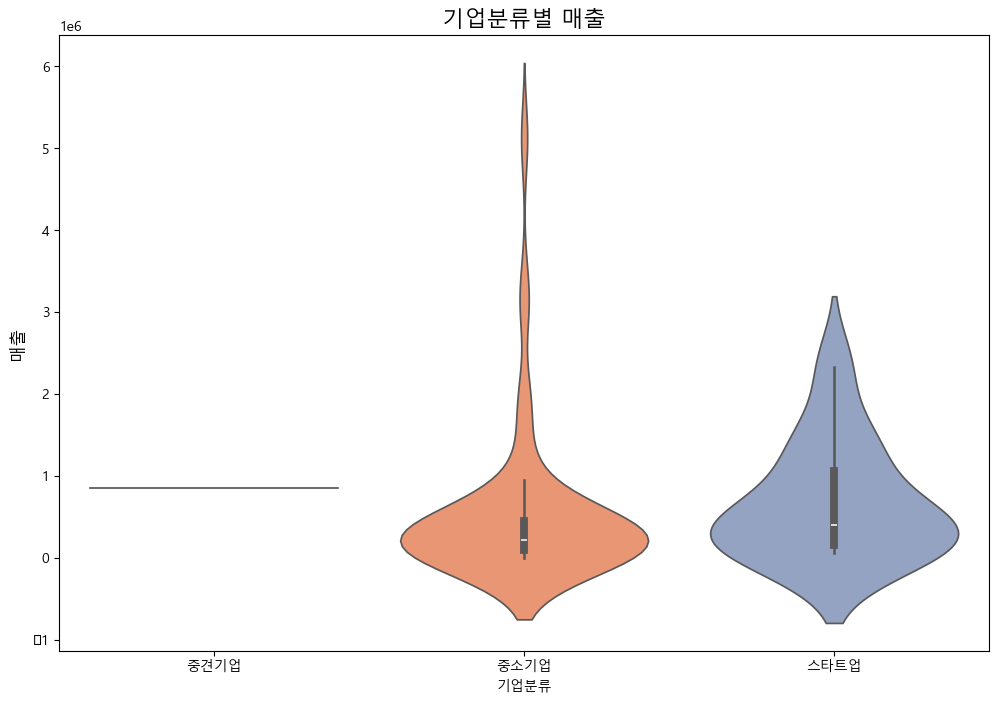

In [17]:
rc('font', family='Malgun Gothic')

plt.figure(figsize=(12, 8))
sns.violinplot(x="기업분류", y="매출", data=df, palette="Set2")

# 제목 및 레이블 설정
plt.title("기업분류별 매출", fontsize=16)
plt.ylabel("매출", fontsize=12)

# 그래프 표시
plt.show()

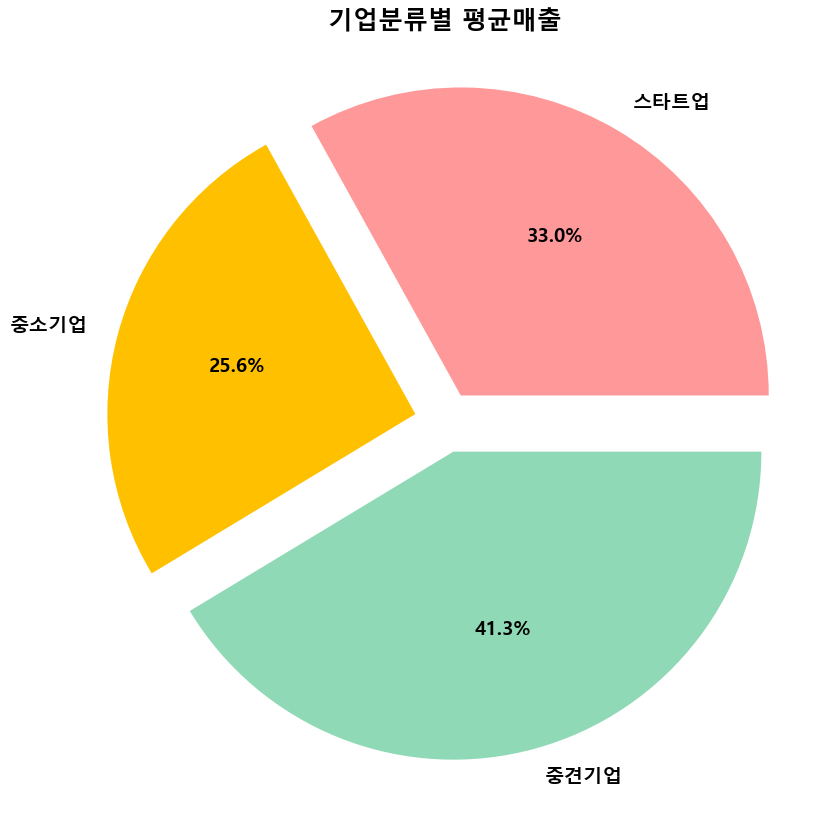

In [29]:
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정
rc('font', family='Malgun Gothic')

# 그래프 크기 설정
plt.figure(figsize=(10, 10))

# 파이차트 데이터
explode = [0.1, 0.1, 0.1]  # 특정 항목을 강조하기 위해 분리
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', "#2E7B26", "#2672B7"]

# 파이차트 생성
plt.pie(
    avg_df["평균매출"],
    labels=avg_df["기업분류"],
    autopct="%.1f%%",  # 퍼센트 표시
    explode=explode,
    colors=colors,
    textprops={'fontsize': 14, 'fontweight': 'bold'}  # 텍스트 크기 및 굵기 설정
)

# 그래프 표시
plt.title("기업분류별 평균매출", fontsize=18, fontweight='bold')  # 제목 크기와 굵기 설정
plt.show()
